# Background

Spotify is a digital music streaming service that offers users access to millions of songs, podcasts, and videos from artists all around the world. Started in Sweden in 2006, Spotify has grown exponentially to become one of the leading music streaming platforms globally. As of 2021, it has over 365 million monthly active users, including more than 165 million paying subscribers.

Spotify operates under a freemium model, offering users a basic, ad-supported service for free, while premium subscribers pay for additional features like ad-free listening and offline playback. Spotify's vast catalog, spanning virtually every genre of music, allows users to not only listen to their favorite songs but also discover new music.

Spotify's Recommender Engine

Spotify's recommender system is one of its defining features. It plays a crucial role in curating personalized content and creating a unique listening experience for each user. The engine leverages a mixture of collaborative filtering, natural language processing (NLP), audio analysis, and deep learning techniques to recommend songs and artists to users.

Collaborative filtering identifies patterns in user behavior to make recommendations. It operates under the assumption that if users A and B both like song X, and user A also likes song Y, then it's likely that user B will also enjoy song Y.

Natural language processing (NLP) is used to analyze textual data like playlist titles, song descriptions, and artist biographies to extract meaningful patterns and associations.

Audio analysis focuses on the music itself, extracting features like tempo, rhythm, key, and loudness. This approach allows Spotify to recommend songs that are musically similar.

Deep learning, involving complex neural networks, helps Spotify make recommendations by learning from vast amounts of data and recognizing complex patterns. These networks are trained using both explicit feedback (such as likes and skips) and implicit feedback (such as the amount of time a user spends listening to a song or the time of day they listen).

Spotify's personalized playlists, such as Discover Weekly and Daily Mixes, are examples of the recommender engine in action. These playlists, tailored to each user's unique musical tastes and listening habits, exemplify the power of machine learning in creating personalized experiences.

Before we proceed with the workshop, I highly encourage everyone to watch this video to understand Spotify's recommender system in more detail. This will serve as the foundation of recommneder engine and deep learning for the rest of the week. In this video, Spotify's engineers share insights about the complex algorithms and vast datasets that power their recommendation engine.

https://www.youtube.com/watch?v=pGntmcy_HX8

Now, let's dive into the world of recommender systems by creating a simplified version of a music recommendation engine using Spotify's track data!

# Objective

The main objective of this code is to build a song recommendation engine using Spotify dataset. The dataset contains various features of songs such as acousticness, danceability, energy, instrumentalness, liveness, speechiness, and valence.

We will use these features to group or cluster the songs using the KMeans clustering algorithm, a popular machine learning algorithm for cluster analysis. The algorithm aims to partition the songs into clusters in which each song belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

After the clusters are created, the model will recommend songs to the user based on their favorite songs. The recommendations are made by identifying the cluster that most of the user's favorite songs belong to, and then suggesting other songs from the same cluster. The assumption here is that songs within the same cluster have similar features and therefore the user is likely to enjoy them.

The final output of the code is a list of song recommendations that are similar in nature to the user's favorite songs.

# Import necessary libraries

First, we import the libraries that we will need for this project. This includes pandas for data manipulation and KMeans from sklearn.cluster for the clustering algorithm.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Spotify dataset

Next, we load the Spotify dataset into a pandas DataFrame. This assumes that the .csv file is located in the same directory as the Python script. If not, you would need to provide the full path to the file.

In [2]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv(r'C:\Users\saanv\Desktop\Brown\spotify_tracks.csv')

In [3]:
tracks_df.describe()

,Unnamed: 0,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence
count,101939.000000,101939.000000,101939.000000,101939.000000,1.019390e+05,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000
mean,50969.000000,0.352124,0.586015,1.032166,2.467708e+05,0.586479,0.148776,5.270858,0.197640,-9.462720,0.618154,39.782311,0.128841,118.358527,3.875651,4.608060,0.482813
std,29427.398883,0.334855,0.177724,0.566789,1.904303e+05,0.260170,0.304024,3.577679,0.175391,6.198508,0.485841,16.790769,0.203324,30.224074,0.517008,7.181805,0.261690
min,0.000000,0.000000,0.000000,1.000000,1.155000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25484.500000,0.040700,0.480000,1.000000,1.840000e+05,0.411000,0.000000,2.000000,0.095600,-11.149000,0.000000,29.000000,0.036400,95.973000,4.000000,1.000000,0.271000
50%,50969.000000,0.238000,0.610000,1.000000,2.168930e+05,0.629000,0.000037,5.000000,0.124000,-7.599000,1.000000,41.000000,0.050600,118.067000,4.000000,2.000000,0.477000
75%,76453.500000,0.645000,0.714000,1.000000,2.610550e+05,0.798000,0.034400,8.000000,0.241000,-5.509000,1.000000,52.000000,0.104000,136.045000,4.000000,6.000000,0.693000
max,101938.000000,0.996000,0.989000,81.000000,5.505831e+06,1.000000,1.000000,11.000000,0.999000,2.719000,1.000000,97.000000,0.969000,244.035000,5.000000,655.000000,0.993000


In [4]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101939 non-null  int64  
 1   acousticness       101939 non-null  float64
 2   album_id           101939 non-null  object 
 3   analysis_url       101939 non-null  object 
 4   artists_id         101939 non-null  object 
 5   available_markets  101939 non-null  object 
 6   country            101939 non-null  object 
 7   danceability       101939 non-null  float64
 8   disc_number        101939 non-null  float64
 9   duration_ms        101939 non-null  float64
 10  energy             101939 non-null  float64
 11  href               101939 non-null  object 
 12  id                 101939 non-null  object 
 13  instrumentalness   101939 non-null  float64
 14  key                101939 non-null  float64
 15  liveness           101939 non-null  float64
 16  lo

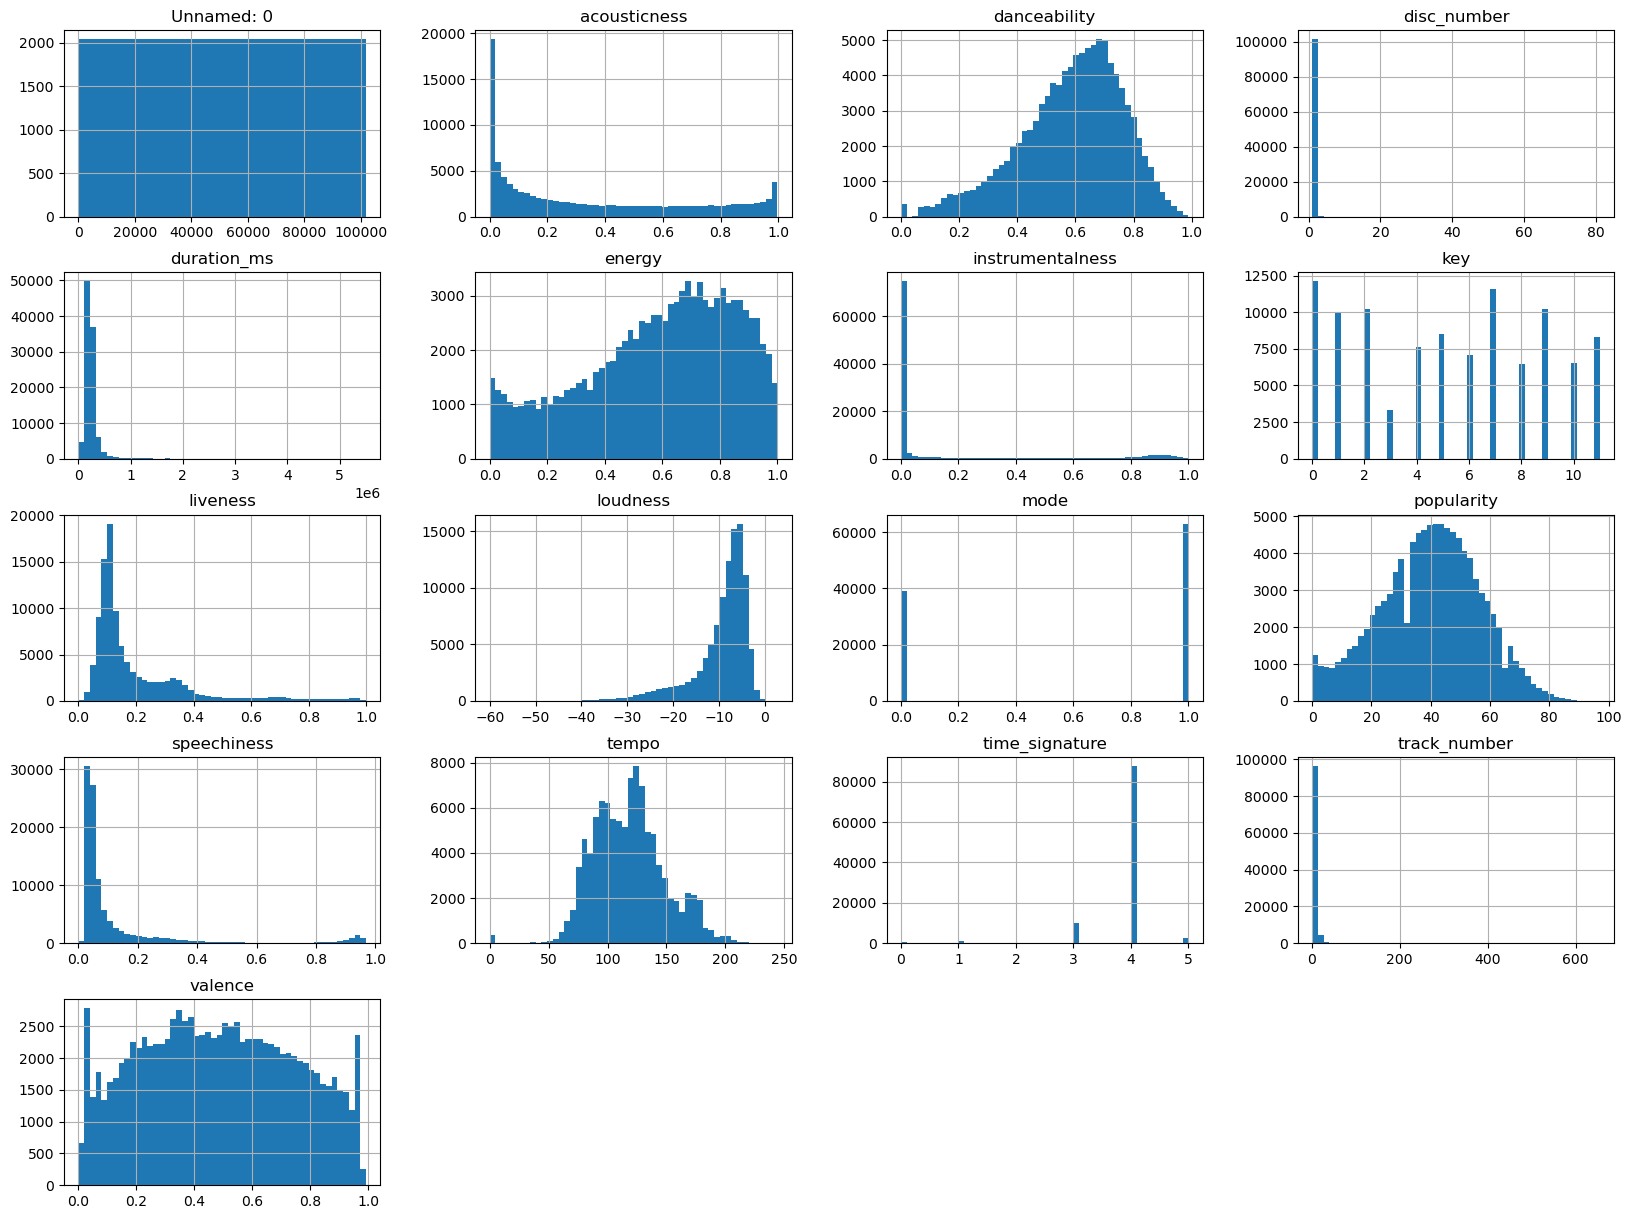

In [5]:
# Display histogram for each variable
tracks_df.hist(bins=50, figsize=(20,15))
plt.show()

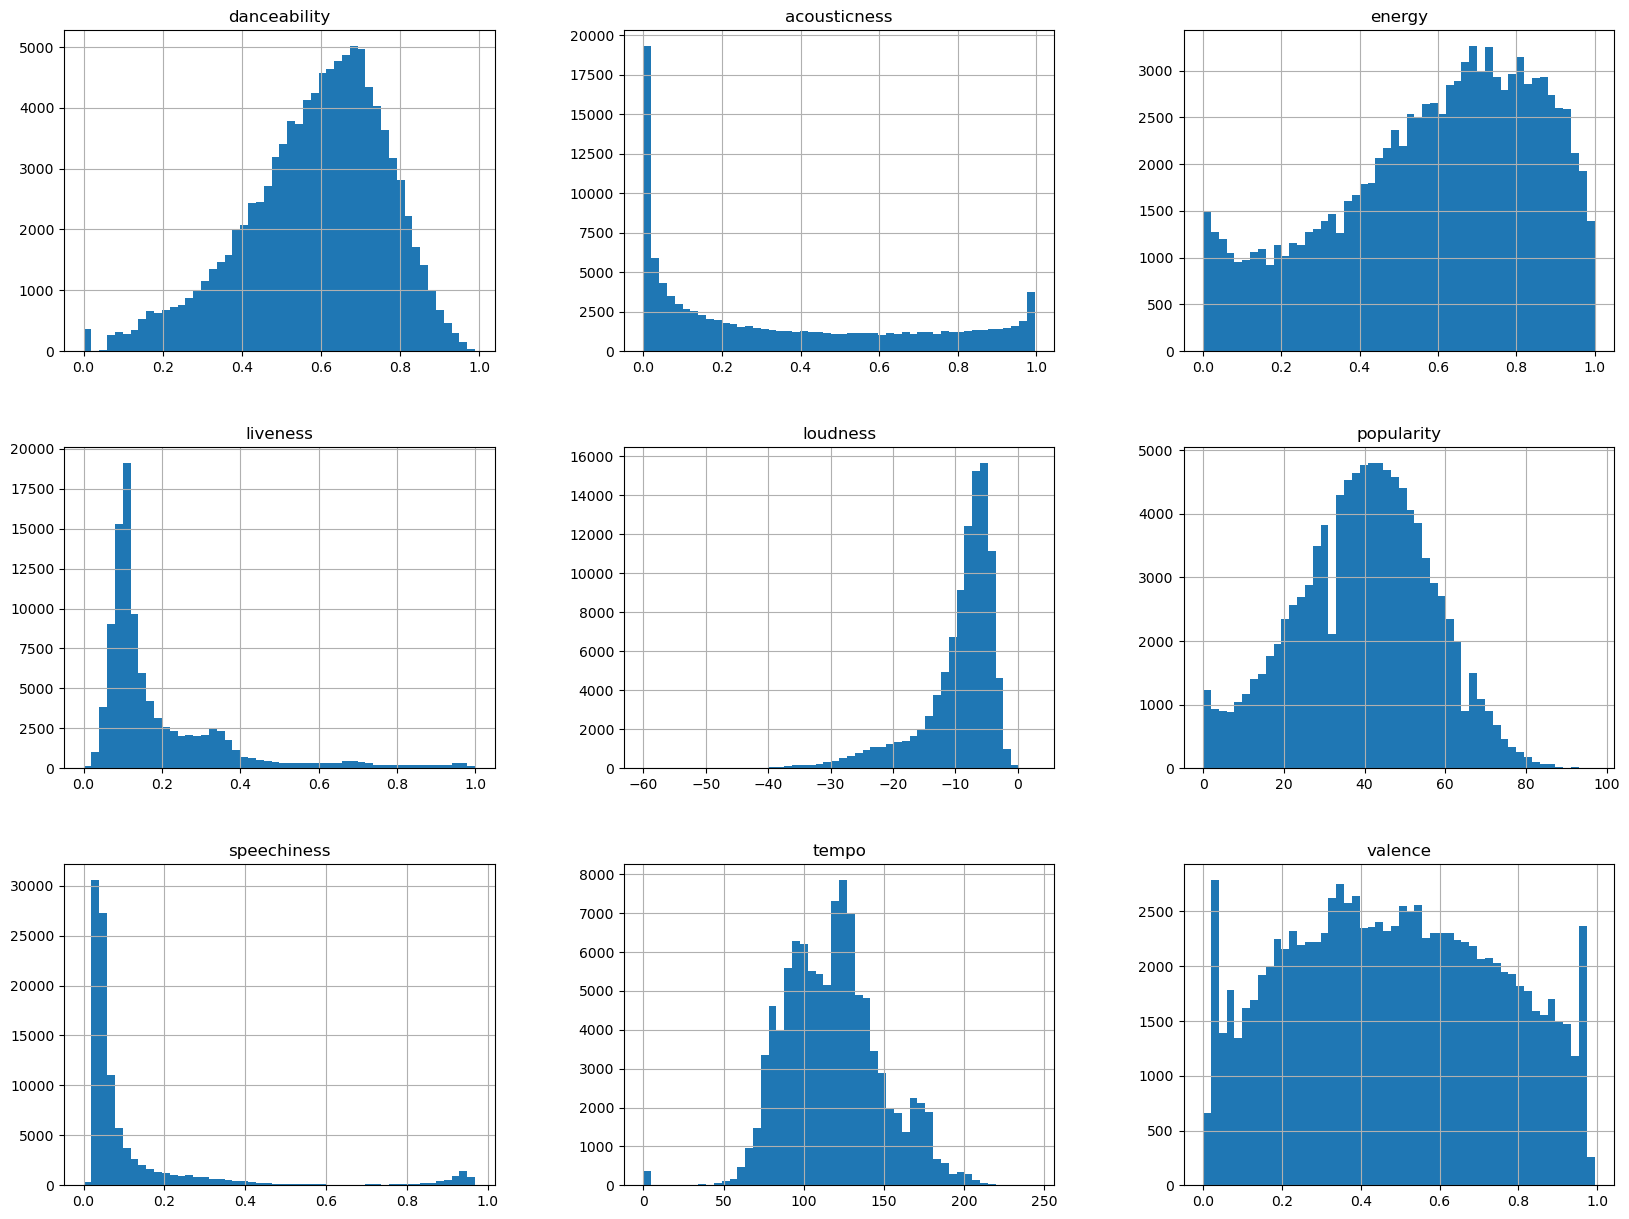

In [6]:
# Display histogram for each numerical variable
tracks = tracks_df[['danceability', 'acousticness', 'energy', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']]
tracks.hist(bins=50, figsize=(20,15))
plt.show()

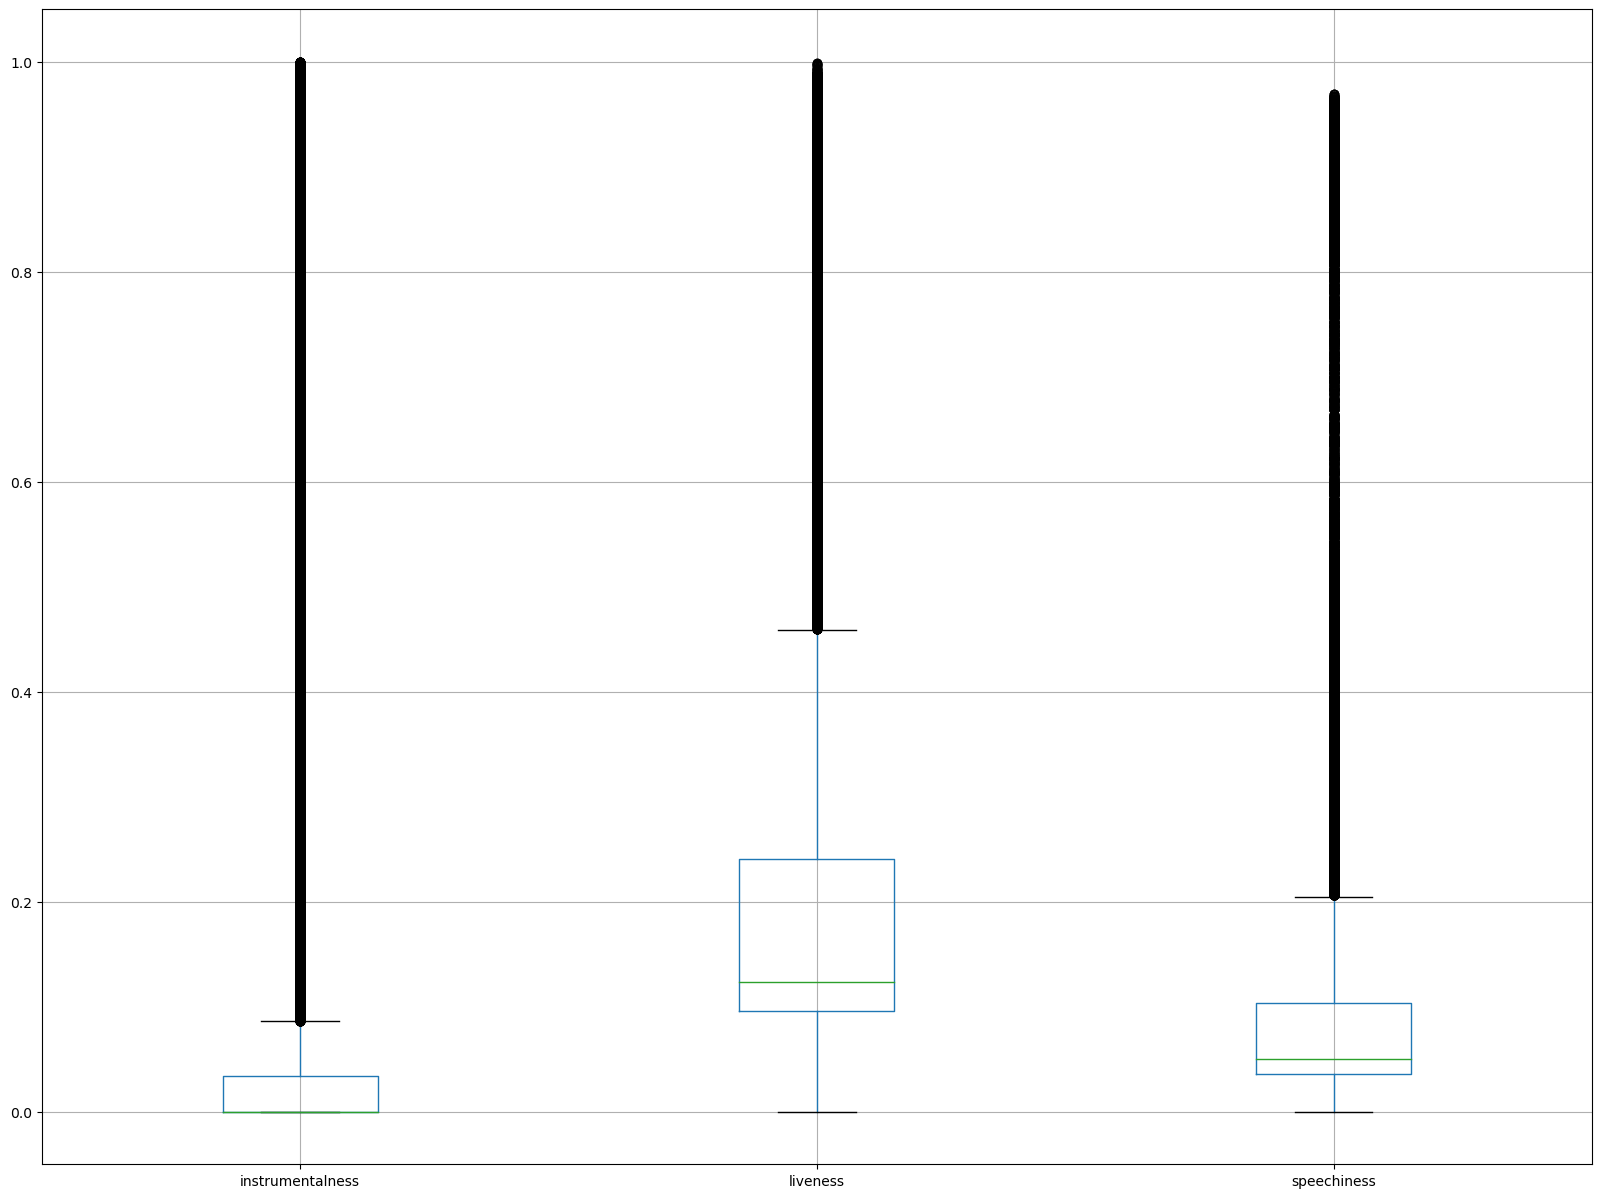

In [7]:
# Display boxplot for variables to analyze outliers
tracks = tracks_df[['instrumentalness', 'liveness', 'speechiness']]

tracks.boxplot(figsize=(20,15))
plt.show()

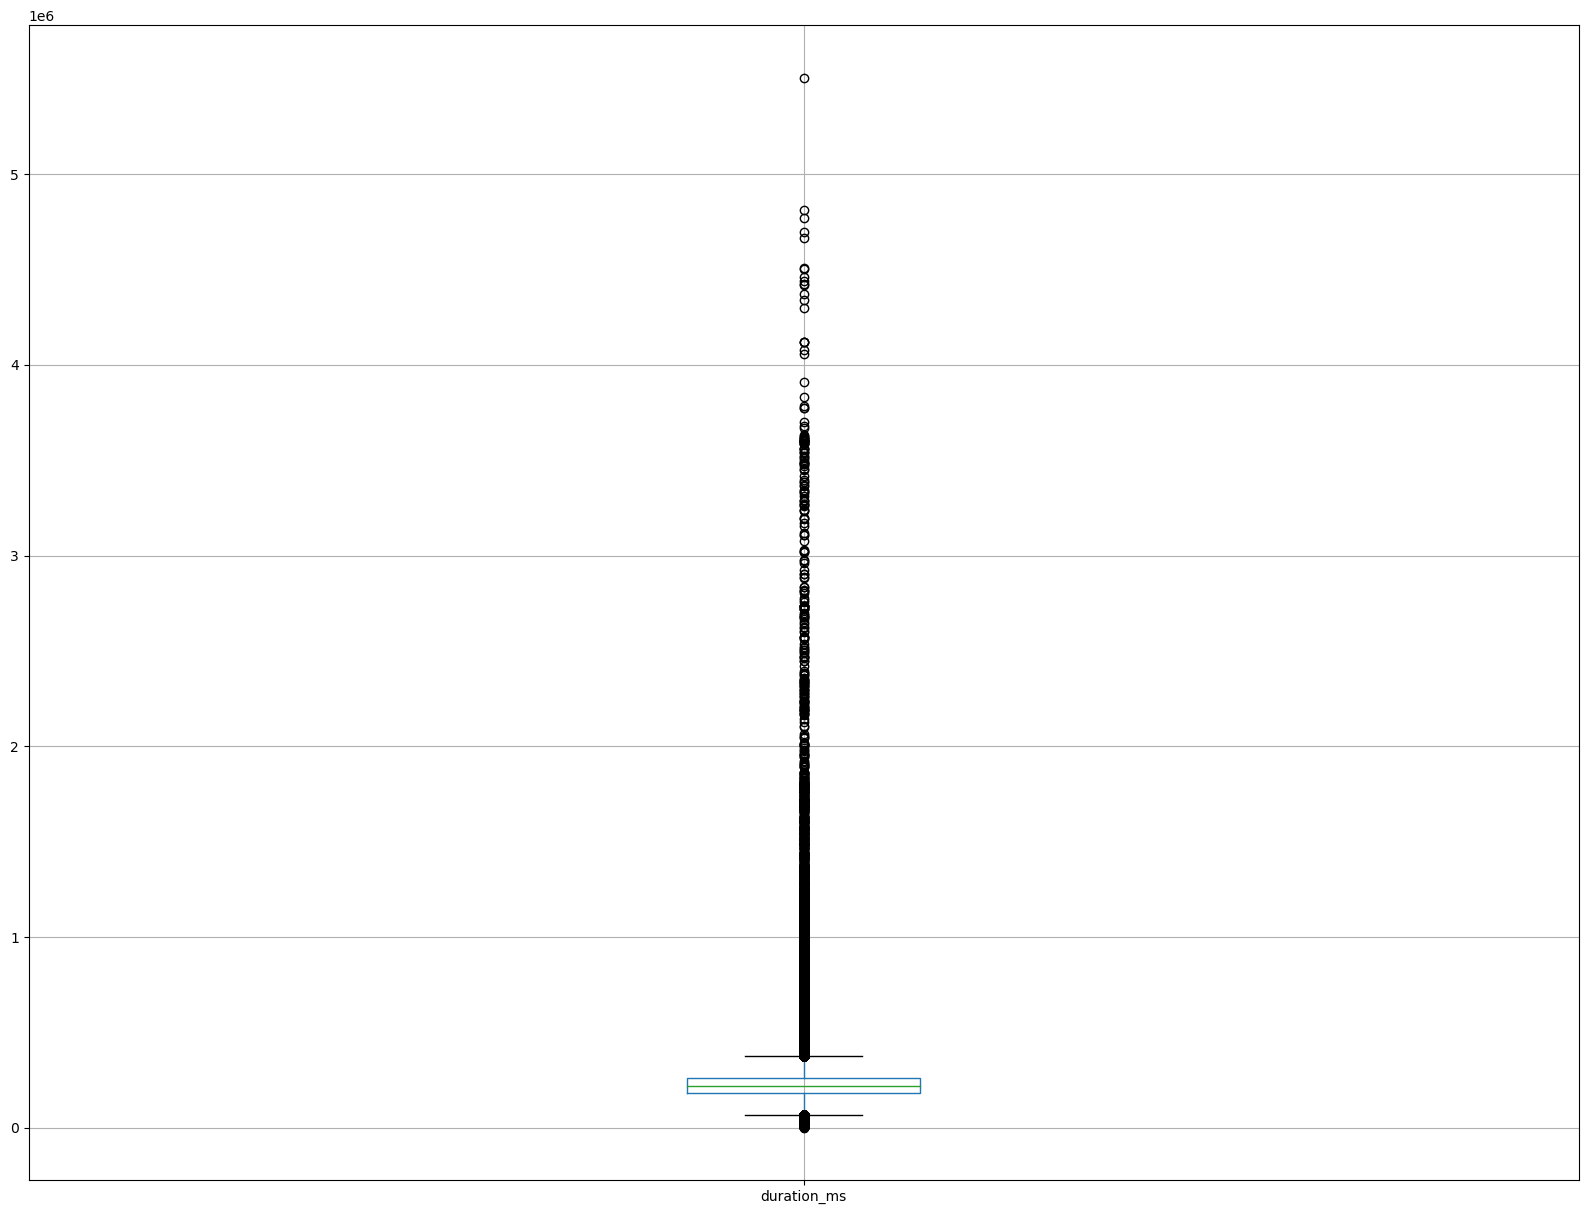

In [8]:
tracks_df[['duration_ms']].boxplot(figsize=(20,15))
plt.show()

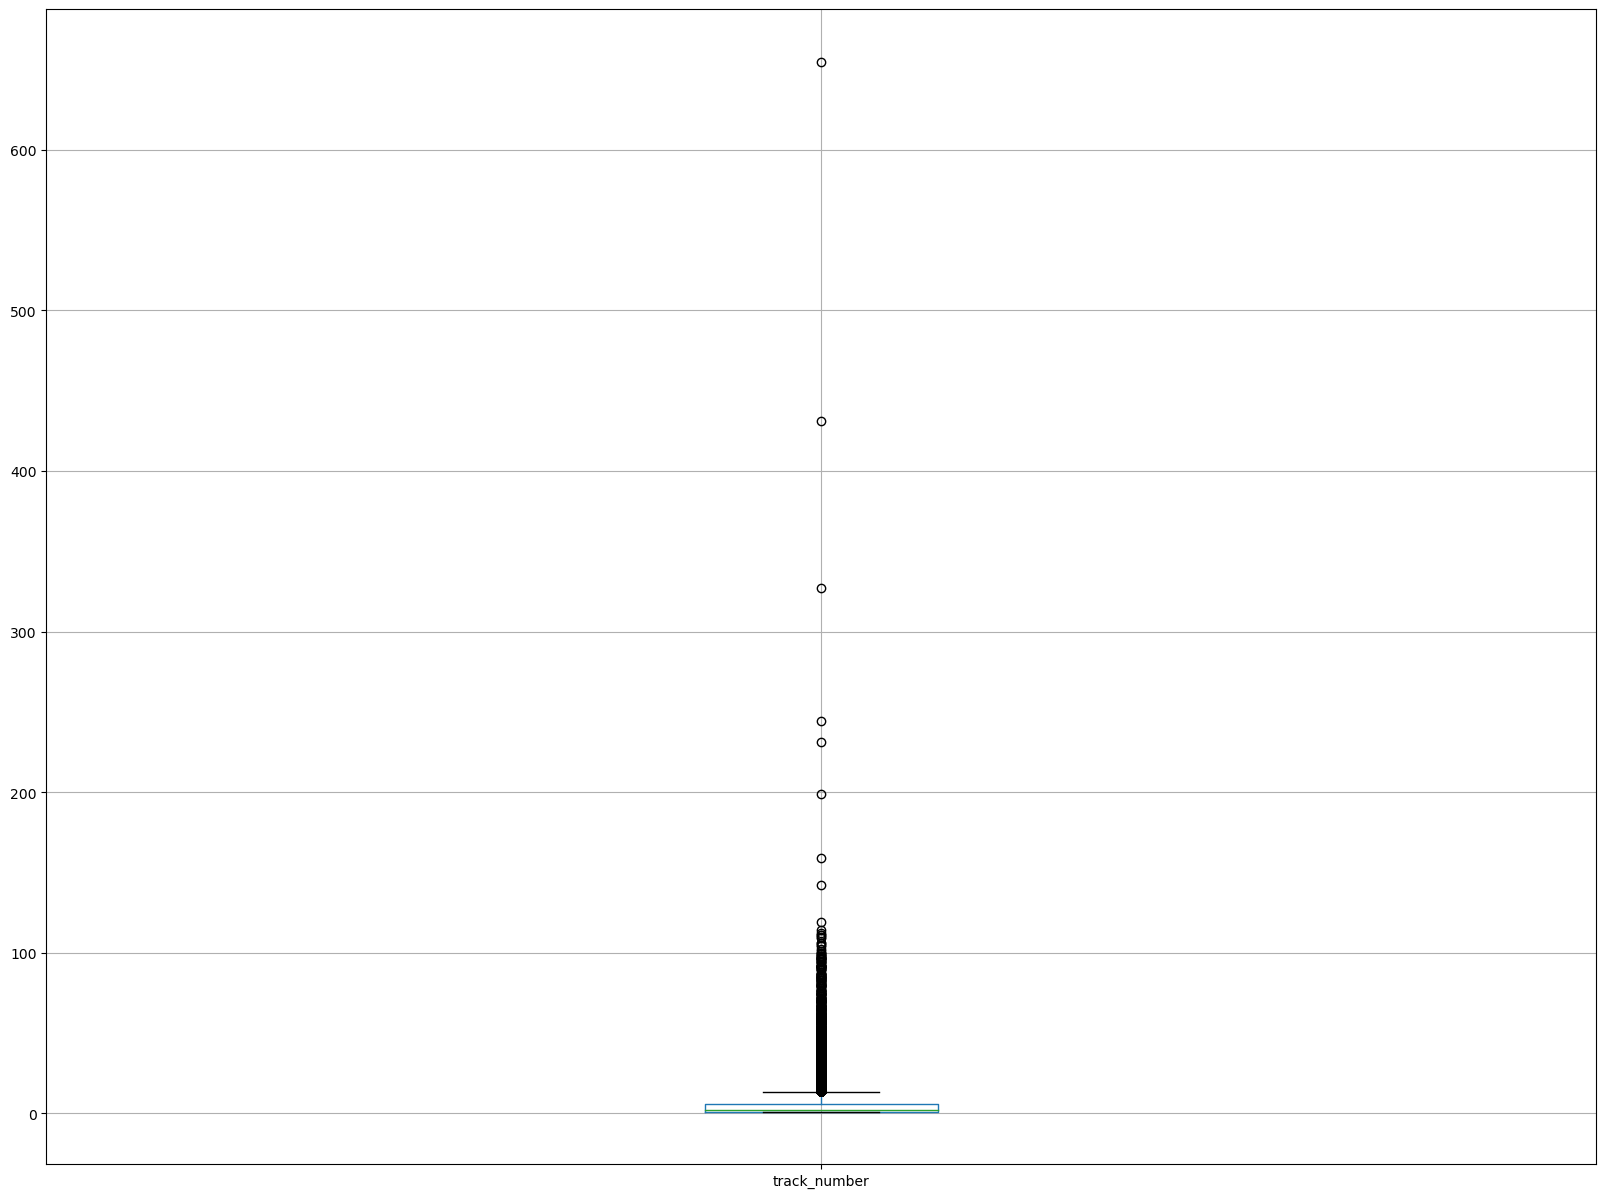

In [9]:
tracks_df[['track_number']].boxplot(figsize=(20,15))
plt.show()

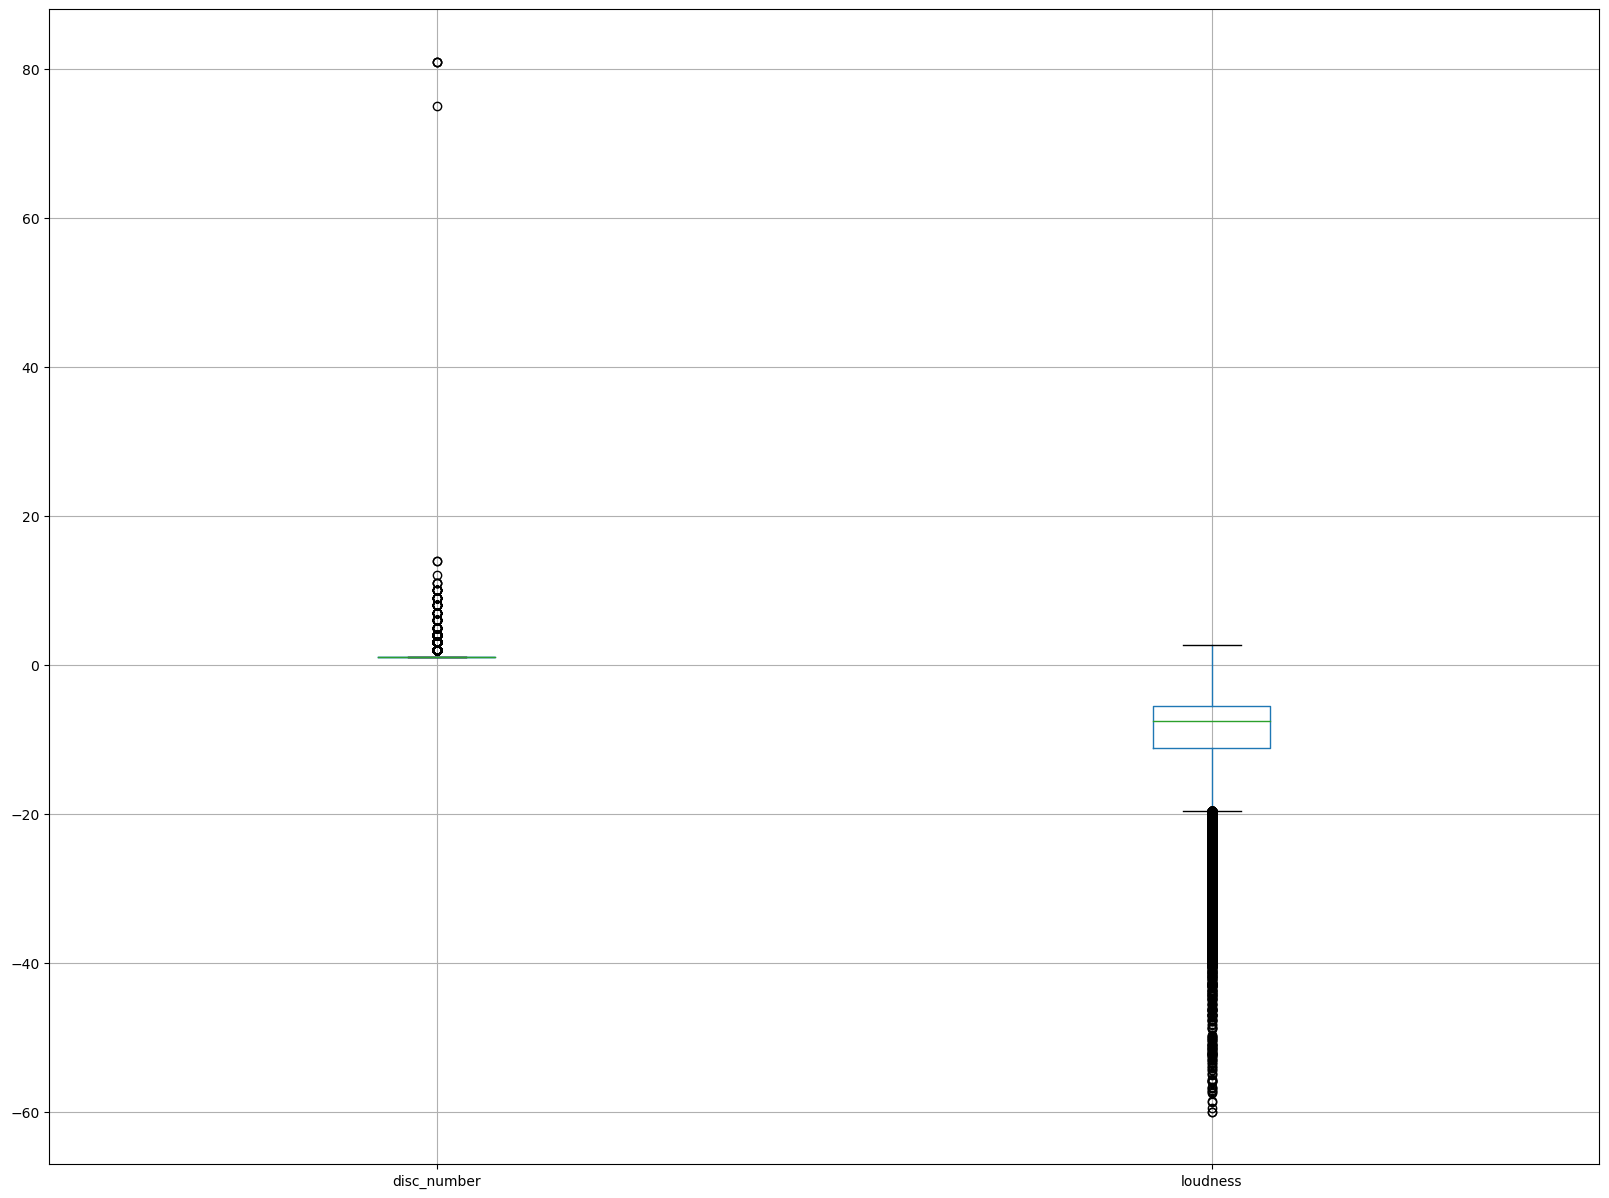

In [10]:
tracks_df[['disc_number', 'loudness']].boxplot(figsize=(20,15))
plt.show()

<Axes: title={'center': 'Mode'}>

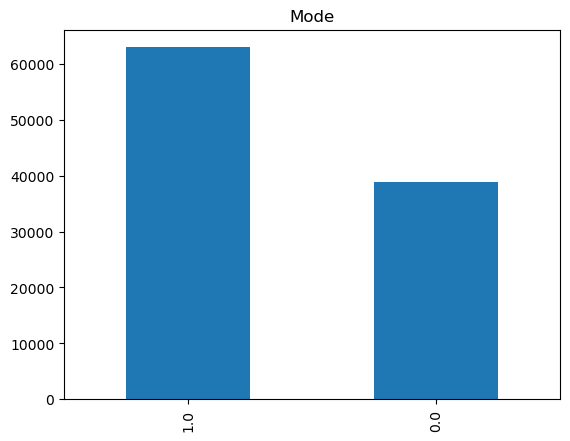

In [11]:
# create bar graphs for categorical variables 
tracks_df['mode'].value_counts().plot(kind='bar', title='Mode')

<Axes: title={'center': 'Key'}>

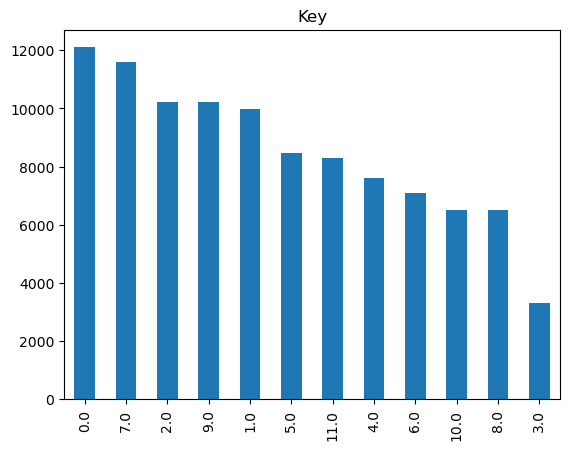

In [12]:
tracks_df['key'].value_counts().plot(kind='bar', title='Key')

<Axes: title={'center': 'Time Signature'}>

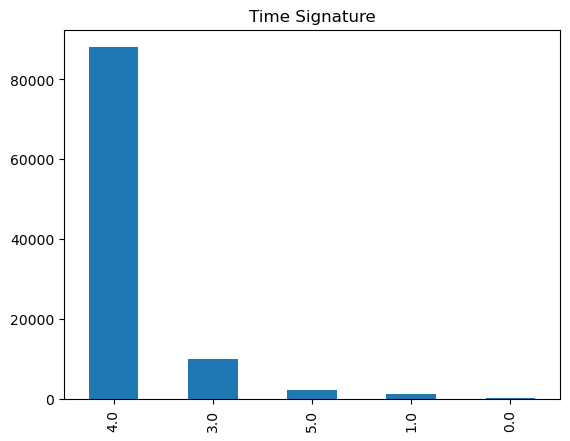

In [13]:
tracks_df['time_signature'].value_counts().plot(kind='bar', title='Time Signature')

# Select necessary features for clustering

We then select the features that we will use for clustering. These features are selected based on their relevance to the kind of music a person might like.

In [14]:
# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

C:\Users\saanv\AppData\Local\Temp\ipykernel_19992\1049999471.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = tracks_df.corr()


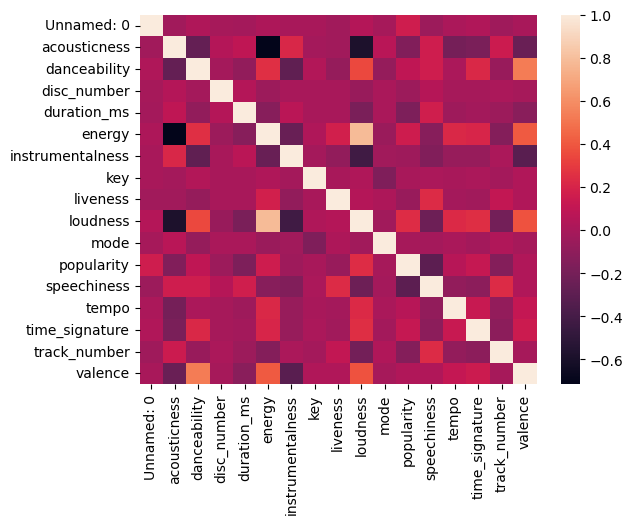

In [15]:
import seaborn as sns
corrMatrix = tracks_df.corr()
sns.heatmap(corrMatrix)
plt.show()

# Initialize and train the KMeans model

Here, we initialize the KMeans model with 5 clusters. This means that we aim to divide our data into 5 different groups. We then train our model using the selected features.

In [16]:
# Initialize the KMeans model with 5 clusters
# We can adjust the number of clusters based on our understanding of the data
kmeans = KMeans(n_clusters=5)

In [17]:
# Train the model with our data
kmeans.fit(tracks)

C:\Users\saanv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# Assign cluster numbers to each track

After training the model, we add a new column to our DataFrame that represents the cluster each track belongs to. This is done using the labels_ attribute of the KMeans model.

In [18]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_

# Save the DataFrame as a new CSV file

Once we have the cluster information added to our DataFrame, we save it as a new CSV file. This way, we don't have to perform the clustering every time we want to make a recommendation.

In [19]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

# User input for favorite songs

Here, we prompt the user to enter the ids of their favorite songs. The ids should be separated by commas.

In [ ]:
# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['id'].isin(ids)]

# Identify the user's favorite cluster

After getting the user's favorite songs, we identify the cluster that these songs most frequently belong to. This is done by counting the occurrences of each cluster number in the 'type' column of the user's favorite songs.

In [ ]:
# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# Make song recommendations

Finally, we make song recommendations based on the user's favorite cluster. We do this by filtering our DataFrame to only include songs that belong to this cluster. We then print the first 5 songs as recommendations.

In [ ]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
print(suggestions.head())